In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [71]:
data=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

In [72]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [73]:
feature=data.drop('ID#',axis=1)

In [74]:
feature.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [77]:
kmeans=KMeans(n_clusters=6)

In [78]:
kcluster=kmeans.fit(feature)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [79]:
np.unique(kcluster.labels_)

array([0, 1, 2, 3, 4, 5])

In [80]:
feature['cluster']=kcluster.labels_

In [81]:
feature.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,5


In [82]:
target=feature[['cluster']]

In [83]:
target.head()

,cluster
0,1
1,1
2,1
3,1
4,5


In [84]:
feature=feature.drop('cluster',axis=1)

In [85]:
std=StandardScaler()

In [86]:
featurestd=std.fit_transform(feature)

In [87]:
feature=pd.DataFrame(featurestd)

In [88]:
feature.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


In [89]:
pca=PCA(n_components=2)

In [90]:
featurepca=pca.fit_transform(feature)

In [91]:
feature=pd.DataFrame(featurepca)

In [92]:
feature.head()

,0,1
0,-1.466674,-0.067183
1,-1.450564,-0.063743
2,-1.210051,-0.133555
3,-1.507201,-0.061529
4,3.006984,-0.185534


In [93]:
feature['cluster']=target

In [94]:
feature.head()

,0,1,cluster
0,-1.466674,-0.067183,1
1,-1.450564,-0.063743,1
2,-1.210051,-0.133555,1
3,-1.507201,-0.061529,1
4,3.006984,-0.185534,5


In [95]:
feature.rename(columns={0:'PCA1',1:'PCA2'},inplace=True)

In [96]:
feature.head()

,PCA1,PCA2,cluster
0,-1.466674,-0.067183,1
1,-1.450564,-0.063743,1
2,-1.210051,-0.133555,1
3,-1.507201,-0.061529,1
4,3.006984,-0.185534,5


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


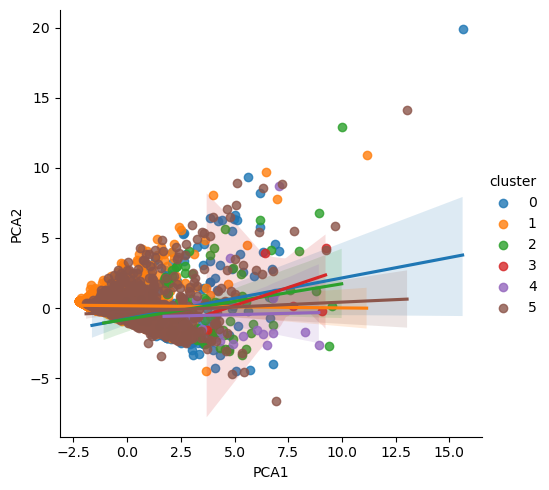

In [97]:
sns.lmplot(data=feature,x='PCA1',y='PCA2',hue='cluster')

In [75]:
inertia=[]
for i in range(1,11):
    kmeans= KMeans(n_clusters=i)
    kmeans.fit(feature)
    inertia.append(kmeans.inertia_)
print(inertia)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[42961820046587.08, 20823632642041.93, 11789152716591.443, 7549630961801.492, 5724556335991.386, 4541474708730.52, 3697664565075.005, 3272039060797.7705, 2902454675761.2183, 2627318315234.0854]


Text(0.5, 1.0, 'Elbow Method')

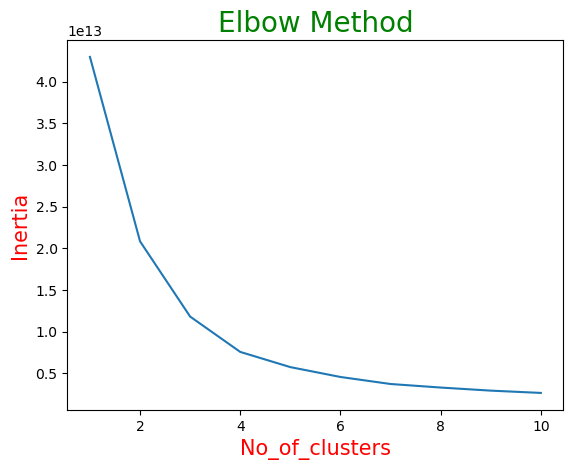

In [76]:
plt.plot(range(1,11),inertia)
plt.xlabel('No_of_clusters',color='red',size=15)
plt.ylabel('Inertia',color='red',size=15)
plt.title('Elbow Method',size=20,color='green')

In [100]:
silhouette_score(feature,target)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.4461642209882899

## Heirarchical Clustering

In [101]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [102]:
data=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

In [103]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [107]:
feature=data.drop(['ID#','Award?'],axis=1)

In [108]:
feature.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935


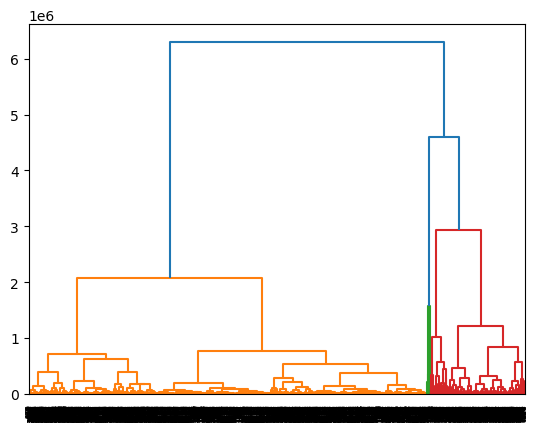

In [109]:
dendrogram=sch.dendrogram(sch.linkage(feature,method='ward'))

In [110]:
agg=AgglomerativeClustering(n_clusters=3)

In [111]:
cluster2=agg.fit(feature)

In [112]:
cluster2.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [113]:
silhouette_score(feature,cluster2.labels_)

0.6495571355884097

## DBSCAN

In [114]:
from sklearn.cluster import DBSCAN


In [116]:
data=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

In [117]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [118]:
feature=data.drop(['ID#','Award?'],axis=1)

In [119]:
std=StandardScaler()

In [120]:
featurestd=std.fit_transform(feature)

In [121]:
feature=pd.DataFrame(featurestd)

In [123]:
eps=[0.1,0.2,0.3,0.4,0.5]
min_node=range(1,11)

In [124]:
output=[]
for ep in eps:
    for mn in min_node:
        labels=DBSCAN(eps=ep,min_samples=mn).fit(feature).labels_
        score=silhouette_score(feature,labels)
        output.append([ep,mn,score])

In [125]:
a=pd.DataFrame(output)

In [126]:
a.iloc[:,2].max()

-0.032381849123670356

In [127]:
a[a[2]==-0.032381849123670356]

,0,1,2
0,0.1,1,-0.032382


In [128]:
labels=DBSCAN(eps=0.1,min_samples=1).fit(feature).labels_

In [130]:
labels

array([   0,    1,    2, ..., 3272, 3273, 1720], dtype=int64)

In [134]:
aw=np.unique(labels)

In [137]:
len(aw)

3274

In [138]:
data.shape

(3999, 12)

In [141]:
pca=PCA(n_components=2)

In [142]:
feature.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975


In [143]:
fpca=pca.fit_transform(feature)

In [145]:
fpca=pd.DataFrame(fpca)

In [146]:
fpca

,0,1
0,-1.302598,-0.066721
1,-1.286259,-0.063392
2,-1.032522,-0.136881
3,-1.346209,-0.060299
4,2.729014,-0.188741
...,...,...
3994,-1.414240,0.509389
3995,-1.491347,0.350574
3996,-0.234557,-0.578579
3997,-1.521419,0.726827


In [147]:
fpca.rename(columns={0:'PCA1',1:'PCA2'},inplace=True)

In [148]:
fpca.head()

,PCA1,PCA2
0,-1.302598,-0.066721
1,-1.286259,-0.063392
2,-1.032522,-0.136881
3,-1.346209,-0.060299
4,2.729014,-0.188741


In [150]:
fpca['labels']=labels

<Axes: xlabel='PCA1', ylabel='PCA2'>

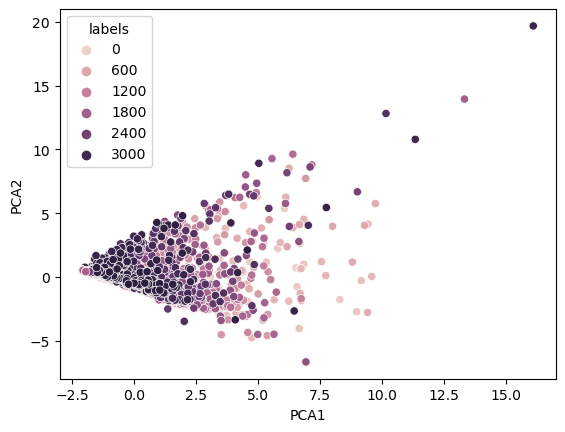

In [152]:
sns.scatterplot(data=fpca,x='PCA1',y='PCA2',hue='labels')

In [156]:
silhouette_score(feature,cluster2.labels_)

0.2968693119682084